<a href="https://colab.research.google.com/github/202218031/DM_Project_2/blob/202218024_Harshita/eda_for_cp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading Dataset**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CSV Files/smoking_driking_dataset_Ver01.csv')

In [3]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


# EXPLORATORY DATA ANALYSIS

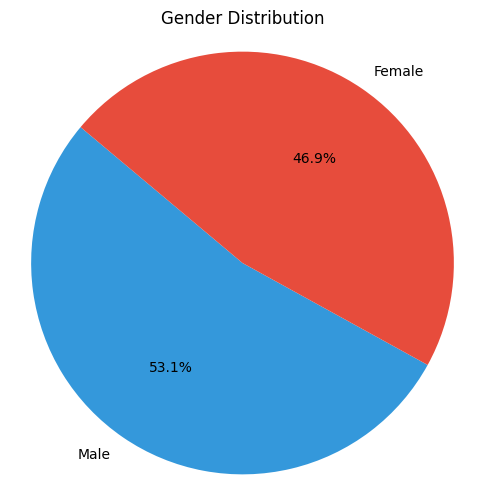

In [7]:
# Calculate gender distribution
gender_counts = df['sex'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

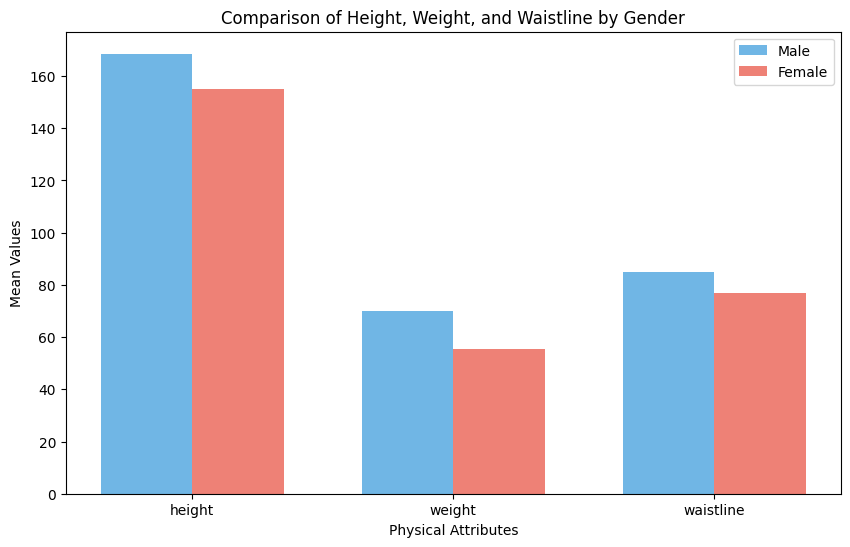

In [8]:
# Grouped bar chart for Body Measurements
grouped_data = df.groupby('sex')[['height', 'weight', 'waistline']].mean().reset_index()

attributes = ['height', 'weight', 'waistline']
male_values = grouped_data[grouped_data['sex'] == 'Male'][attributes].values[0]
female_values = grouped_data[grouped_data['sex'] == 'Female'][attributes].values[0]

bar_positions = range(len(attributes))

bar_width = 0.35

colors = ['#3498db', '#e74c3c']

plt.figure(figsize=(10, 6))
plt.bar(bar_positions, male_values, bar_width, label='Male', alpha=0.7, color=colors[0])
plt.bar([pos + bar_width for pos in bar_positions], female_values, bar_width, label='Female', alpha=0.7, color=colors[1])

plt.xticks([pos + bar_width / 2 for pos in bar_positions], attributes)

plt.xlabel('Physical Attributes')
plt.ylabel('Mean Values')
plt.title('Comparison of Height, Weight, and Waistline by Gender')
plt.legend()
plt.show()

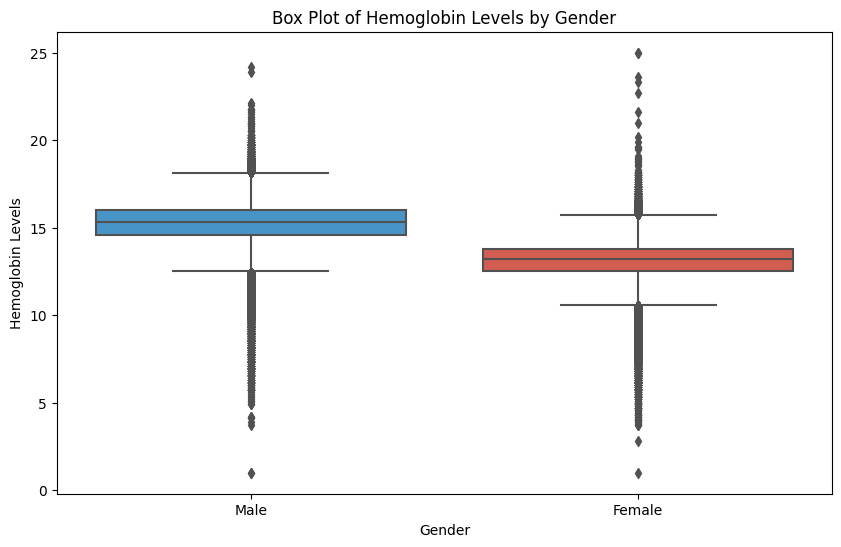

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='hemoglobin', data=df)
plt.title('Box Plot of Hemoglobin Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Hemoglobin Levels')
plt.show()

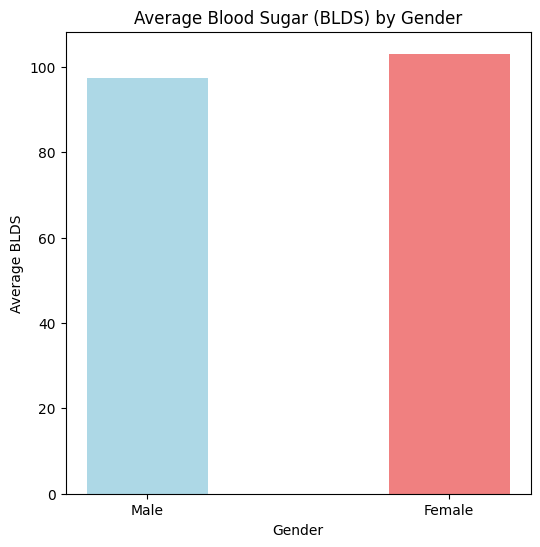

In [10]:
average_blds_by_gender = df.groupby('sex')['BLDS'].mean()
average_serum_creatinine_by_gender = df.groupby('sex')['serum_creatinine'].mean()

bar_colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.bar(average_blds_by_gender.index, average_blds_by_gender, color=bar_colors, width=0.4)
plt.title('Average Blood Sugar (BLDS) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average BLDS')
plt.xticks(average_blds_by_gender.index, ['Male', 'Female'])
plt.show()

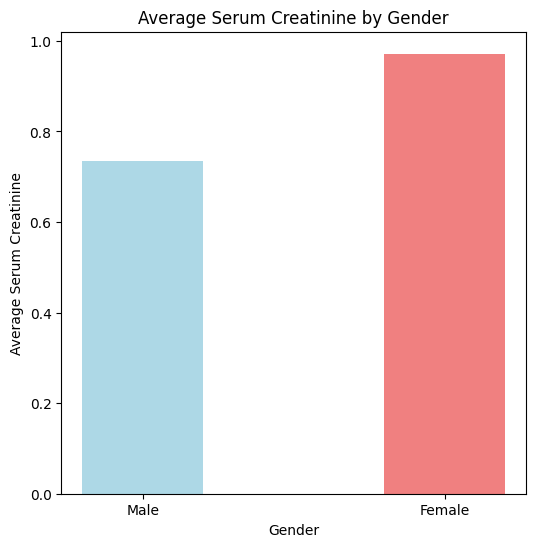

In [11]:
plt.figure(figsize=(6, 6))
plt.bar(average_serum_creatinine_by_gender.index, average_serum_creatinine_by_gender, color=bar_colors, width=0.4)
plt.title('Average Serum Creatinine by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Serum Creatinine')
plt.xticks(average_serum_creatinine_by_gender.index, ['Male', 'Female'])
plt.show()

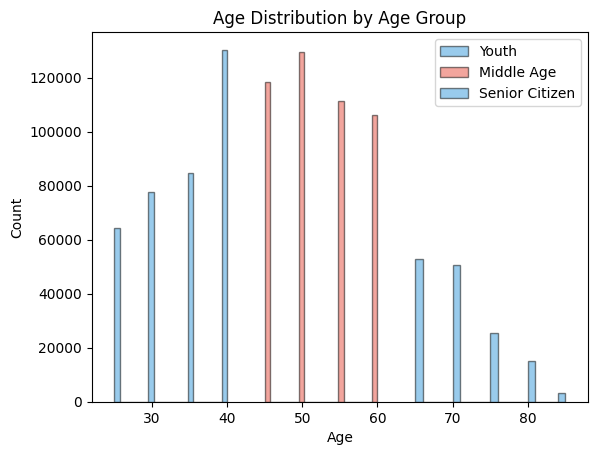

In [12]:
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 85], labels=['Youth', 'Middle Age', 'Senior Citizen'])

# Filter the data for age between 20 and 85
filtered_data = df[(df['age'] >= 20) & (df['age'] <= 85)]

# Create a histogram of age distribution by age group
plt.hist(filtered_data['age'][df['age_group'] == 'Youth'], bins=20, alpha=0.5, label='Youth', edgecolor='k')
plt.hist(filtered_data['age'][df['age_group'] == 'Middle Age'], bins=20, alpha=0.5, label='Middle Age', edgecolor='k')
plt.hist(filtered_data['age'][df['age_group'] == 'Senior Citizen'], bins=20, alpha=0.5, label='Senior Citizen', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Age Group')
plt.legend()
plt.show()

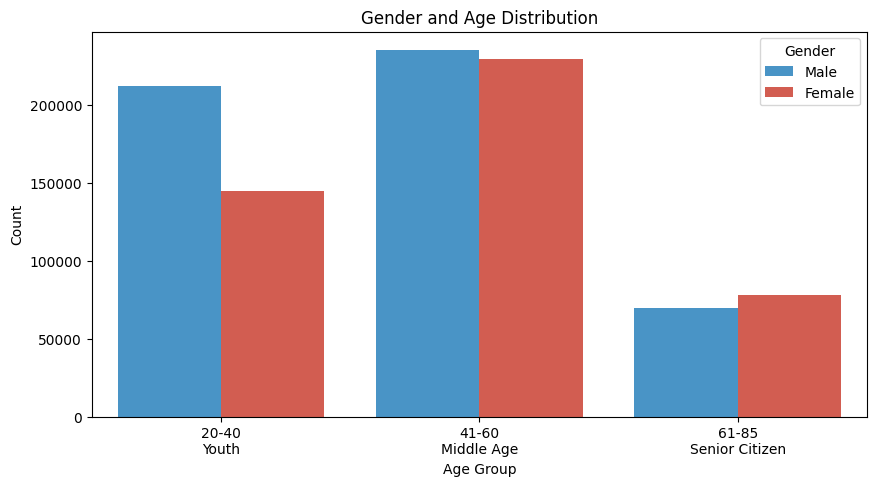

In [13]:
# Gender and Age Distribution (Bar Chart)
plt.figure(figsize=(10, 5))
colors = ["#3498db", "#e74c3c"]
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(data=df, x='age_group', hue='sex')
age_range_labels = ['20-40', '41-60', '61-85']
ax.set_xticklabels([f'{label}\n{age}' for label, age in zip(age_range_labels, df['age_group'].cat.categories)])

plt.title('Gender and Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

plt.show()

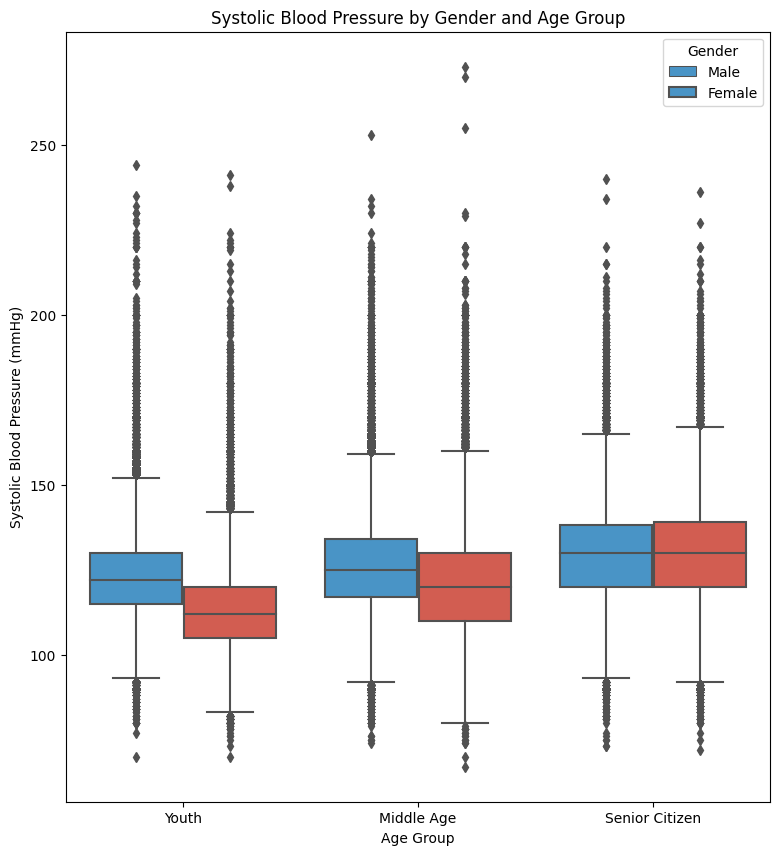

In [14]:
# Blood Pressure Analysis (Box Plots)
plt.figure(figsize=(20, 10))

# Customize colors
colors = ["#3498db", "#e74c3c"]  # Specify your own colors

# Create box plots for systolic blood pressure (SBP)
plt.subplot(1, 2, 1)
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=df, x='age_group', y='SBP', hue='sex')
plt.title('Systolic Blood Pressure by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

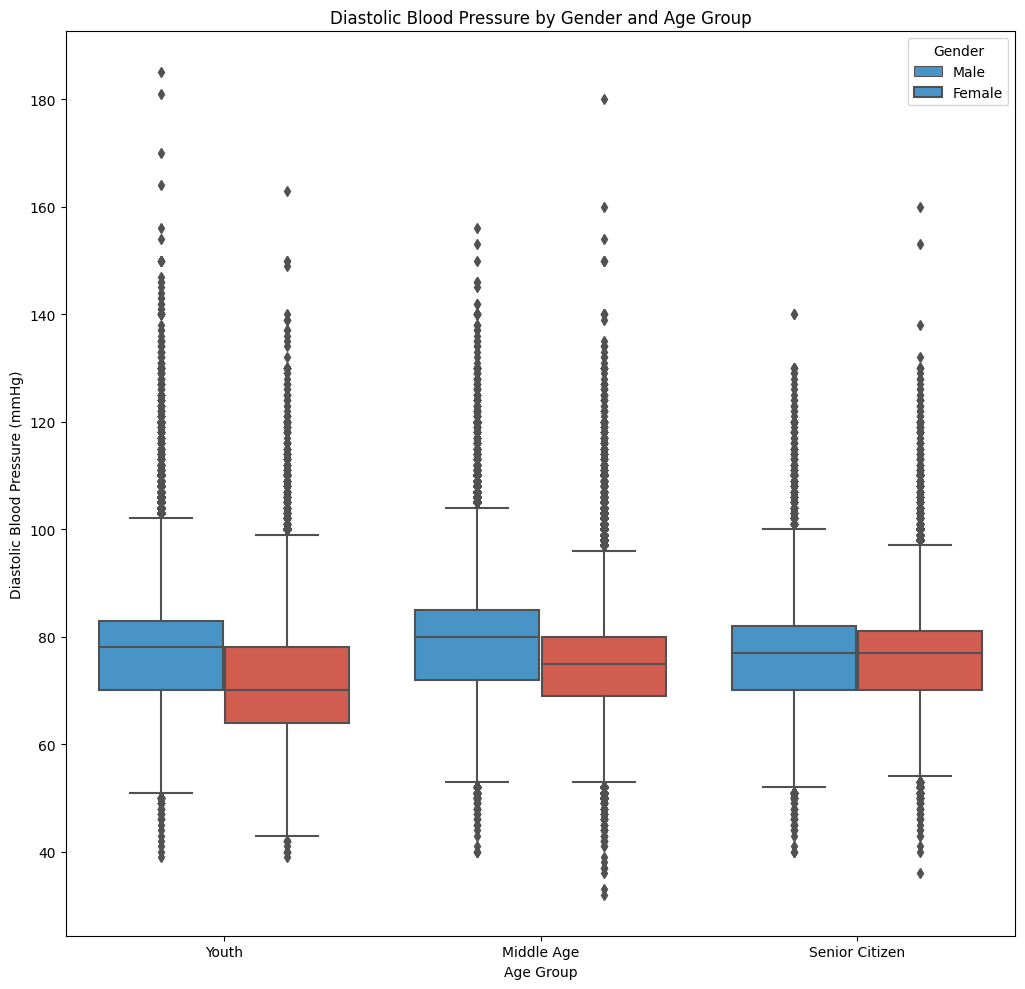

In [15]:
# Create box plots for diastolic blood pressure (DBP)
plt.figure(figsize=(20, 10))
colors = ["#3498db", "#e74c3c"]
plt.subplot(1, 2, 2)
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=df, x='age_group', y='DBP', hue='sex')
plt.title('Diastolic Blood Pressure by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

plt.tight_layout()
plt.show()